## Biostatistics Group Project
Data analysis

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from statsmodels.graphics.mosaicplot import mosaic
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
import statsmodels.api as sm

print("Imports Successful")

Imports Successful


In [25]:
df = pd.read_excel(r'/Users/mehrnazsiavoshi/Documents/Liberty/UCSD Extension/Biostatistics/lipid2.xls', sheet_name='lipid2')
df.head()

,Patient ID,Drug,Stomach Pain,Sex,Age,Height,Systolic BP,Diastolic BP,Exercise,Coffee Consumption,...,Triglycerides,Triglycerides3,HDL,HDL3,LDL,LDL3,Tri3-Tri,HDL3-HDL,CHOL3-CHOL,W3-W
0,17,A,Yes,F,22,71.5,118,70,60,0,...,81,91,42,40,126.7,116.5,10,-2,-12,-1
1,30,A,Yes,F,23,74.0,124,76,60,0,...,94,92,43,44,119.5,118.5,-2,1,0,1
2,9,A,Yes,F,23,73.5,124,82,60,1,...,307,88,28,28,201.1,145.6,-219,0,-59,-12
3,21,A,No,F,28,71.0,110,80,60,2,...,107,145,53,47,152.3,181.7,38,-6,24,0
4,32,A,Yes,F,23,71.5,124,70,180,3,...,63,60,52,44,158.0,138.0,-3,-8,-28,2


## General Analysis

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Patient ID           45 non-null     int64  
 1   Drug                 45 non-null     object 
 2   Stomach Pain         45 non-null     object 
 3   Sex                  45 non-null     object 
 4   Age                  45 non-null     int64  
 5   Height               45 non-null     float64
 6   Systolic BP          45 non-null     int64  
 7   Diastolic BP         45 non-null     int64  
 8   Exercise             45 non-null     int64  
 9   Coffee Consumption   45 non-null     int64  
 10  Alcohol Consumption  45 non-null     object 
 11  Weight               45 non-null     int64  
 12  Weight3              45 non-null     int64  
 13  Cholesterol          45 non-null     int64  
 14  Cholesterol3         45 non-null     int64  
 15  Triglycerides        45 non-null     int64

In [27]:
df.describe()

,Patient ID,Age,Height,Systolic BP,Diastolic BP,Exercise,Coffee Consumption,Weight,Weight3,Cholesterol,...,Triglycerides,Triglycerides3,HDL,HDL3,LDL,LDL3,Tri3-Tri,HDL3-HDL,CHOL3-CHOL,W3-W
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.00000,45.000000,45.000000,45.000000,45.000000,...,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,23.000000,24.088889,69.775111,122.933333,76.866667,90.00000,1.400000,165.377778,166.755556,190.155556,...,111.688889,108.355556,44.111111,39.066667,144.195556,139.797778,-3.333333,-5.044444,-9.533333,1.377778
std,13.133926,3.253126,3.902646,7.924071,6.047539,85.33357,1.750325,27.926274,27.796464,38.290134,...,80.520980,57.067008,11.281969,10.263351,34.649091,37.559495,56.860275,10.269008,27.942799,8.249763
min,1.000000,20.000000,59.000000,100.000000,68.000000,0.00000,0.000000,115.000000,105.000000,115.000000,...,44.000000,53.000000,25.000000,21.000000,72.100000,64.800000,-219.000000,-43.000000,-62.000000,-17.000000
25%,12.000000,22.000000,67.500000,120.000000,72.000000,0.00000,0.000000,149.000000,150.000000,164.000000,...,71.000000,73.000000,37.000000,31.000000,119.500000,115.800000,-18.000000,-9.000000,-30.000000,-3.000000
50%,23.000000,23.000000,71.000000,124.000000,76.000000,90.00000,1.000000,160.000000,165.000000,194.000000,...,93.000000,91.000000,42.000000,38.000000,147.100000,130.600000,1.000000,-4.000000,-6.000000,2.000000
75%,34.000000,25.000000,73.000000,128.000000,82.000000,150.00000,2.000000,182.000000,186.000000,212.000000,...,116.000000,126.000000,50.000000,46.000000,166.800000,166.600000,20.000000,1.000000,12.000000,7.000000
max,45.000000,40.000000,75.500000,138.000000,92.000000,360.00000,5.000000,234.000000,230.000000,285.000000,...,480.000000,373.000000,71.000000,67.000000,223.200000,251.800000,183.000000,15.000000,73.000000,23.000000


## Question 1: Is there a significant difference between drug type and triglycerides from screening to followup? 

No, there is no significant difference in triglyceride change over the course of the treatment between the two drugs.

In [29]:
drug_a = df[df.Drug == 'A']
drug_b = df[df.Drug == 'B']

In [30]:
drug_a_tri = drug_a['Tri3-Tri'].tolist()
drug_b_tri = drug_b['Tri3-Tri'].tolist()
print(len(drug_a_tri), len(drug_b_tri))

23 22


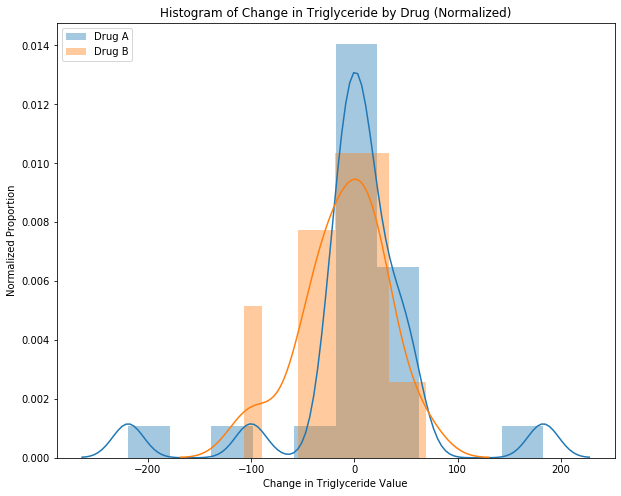

In [31]:
plt.figure(figsize = (10,8))
sb.distplot(drug_a_tri, bins=10, label="Drug A", norm_hist=True)
sb.distplot(drug_b_tri, bins=10, label="Drug B", norm_hist=True)
plt.legend(loc='upper left')
plt.xlabel("Change in Triglyceride Value")
plt.ylabel("Normalized Proportion")
plt.title("Histogram of Change in Triglyceride by Drug (Normalized)")
plt.show()

''

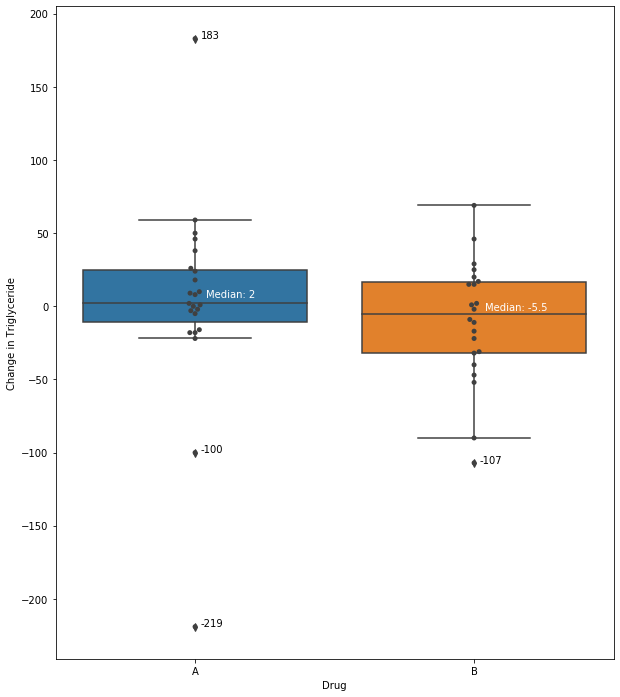

In [32]:
plt.figure(figsize=(10,12))
sb.boxplot(x=df["Drug"], y=df['Tri3-Tri'])
sb.swarmplot(x=df["Drug"], y=df['Tri3-Tri'], color='.25')
plt.ylabel("Change in Triglyceride")
plt.text(0.02, -219, '-219')
plt.text(0.02, -100, '-100')
plt.text(0.02, 183, '183')
plt.text(1.02, -107, '-107')
plt.text(0.04, 6, 'Median: 2', color='white')
plt.text(1.04, -2.5, 'Median: -5.5', color='white')
;


In [33]:
stats.ttest_ind(drug_a_tri, drug_b_tri, equal_var = False)

Ttest_indResult(statistic=0.7790775288363618, pvalue=0.4409630520614606)

## Question 2: Is there an association between coffee consumption and stomach pain? 

In [34]:
coffee_table = pd.crosstab(df['Coffee Consumption'], df['Stomach Pain'])
coffee_table

Stomach Pain,No,Yes
Coffee Consumption,,
0,9,12
1,2,5
2,5,3
3,1,1
4,0,1
5,2,4


In [35]:
coffee_table.describe

<bound method NDFrame.describe of Stomach Pain        No  Yes
Coffee Consumption         
0                    9   12
1                    2    5
2                    5    3
3                    1    1
4                    0    1
5                    2    4>

<Figure size 576x432 with 0 Axes>

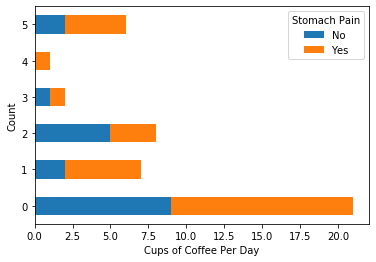

In [36]:
plt.figure(figsize = (8,6))
coffee_table.plot.barh(stacked=True)
plt.xlabel("Cups of Coffee Per Day")
plt.ylabel("Count")
plt.show()

In [37]:
stat,p,dof,expected = chi2_contingency(coffee_table)
print(stat, p, dof)

2.8612998843262 0.7213589718644879 5


## Question 3: Is there a relationship between diastolic blood pressure and cholesterol reading at screening for female patients? 

In [38]:
female = df[df.Sex == "F"]
female.head()

,Patient ID,Drug,Stomach Pain,Sex,Age,Height,Systolic BP,Diastolic BP,Exercise,Coffee Consumption,...,Triglycerides,Triglycerides3,HDL,HDL3,LDL,LDL3,Tri3-Tri,HDL3-HDL,CHOL3-CHOL,W3-W
0,17,A,Yes,F,22,71.5,118,70,60,0,...,81,91,42,40,126.7,116.5,10,-2,-12,-1
1,30,A,Yes,F,23,74.0,124,76,60,0,...,94,92,43,44,119.5,118.5,-2,1,0,1
2,9,A,Yes,F,23,73.5,124,82,60,1,...,307,88,28,28,201.1,145.6,-219,0,-59,-12
3,21,A,No,F,28,71.0,110,80,60,2,...,107,145,53,47,152.3,181.7,38,-6,24,0
4,32,A,Yes,F,23,71.5,124,70,180,3,...,63,60,52,44,158.0,138.0,-3,-8,-28,2


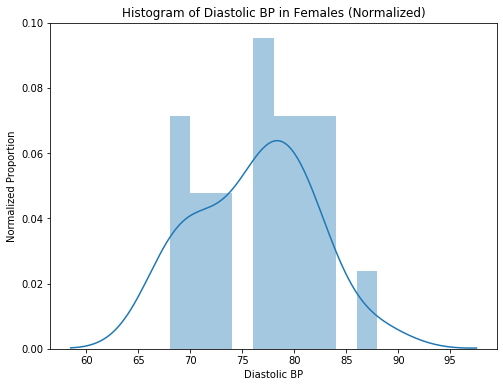

In [39]:
plt.figure(figsize = (8,6))
sb.distplot(female['Diastolic BP'], bins=10, label="Diastolic BP", norm_hist=True)
plt.ylabel("Normalized Proportion")
plt.title("Histogram of Diastolic BP in Females (Normalized)")
plt.show()

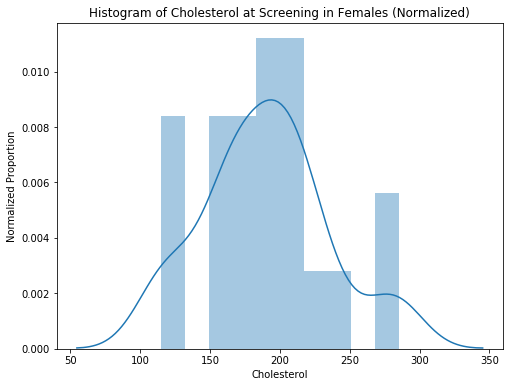

In [40]:
plt.figure(figsize = (8,6))
sb.distplot(female['Cholesterol'], bins=10, label="Diastolic BP", norm_hist=True)
plt.ylabel("Normalized Proportion")
plt.title("Histogram of Cholesterol at Screening in Females (Normalized)")
plt.show()

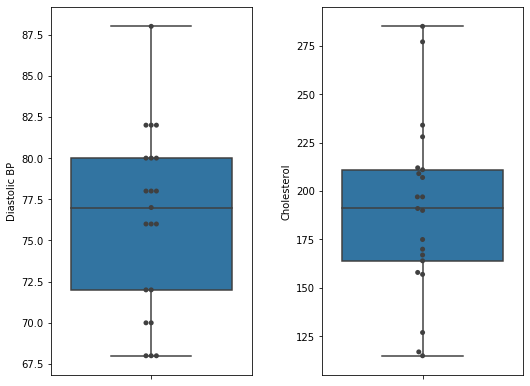

In [41]:
f,axes = plt.subplots(1,2, figsize=(8,6))
sb.boxplot(x=female['Diastolic BP'], orient='v', ax=axes[0])
sb.swarmplot(x=female['Diastolic BP'], orient='v', color='.25', ax=axes[0])
sb.boxplot(x=female['Cholesterol'], orient='v', whis=1.7, ax=axes[1])
sb.swarmplot(x=female['Cholesterol'], orient='v', color='.25', ax=axes[1])
f.tight_layout(pad=3)



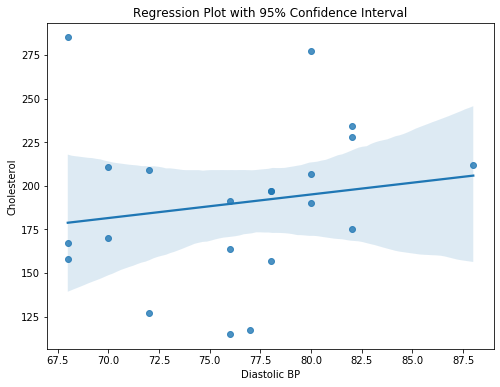

In [42]:
plt.figure(figsize = (8,6))
sb.regplot(data=female, x='Diastolic BP', y='Cholesterol', ci=95)
plt.title("Regression Plot with 95% Confidence Interval");


In [43]:
X = np.array(female['Diastolic BP']).reshape(-1,1)
y = female['Cholesterol']

In [44]:
model=LinearRegression()
model.fit(X,y)
model = LinearRegression().fit(X,y)
r_sq = model.score(X,y)
r_int = model.intercept_
r_slope = model.coef_

print(r_sq, r_int, r_slope)

0.027404341961175138 86.86626449388906 [1.35153557]


In [45]:
X2 = sm.add_constant(X)
est = sm.OLS(y,X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:            Cholesterol   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                 -0.024
Method:                 Least Squares   F-statistic:                    0.5354
Date:                Thu, 29 Oct 2020   Prob (F-statistic):              0.473
Time:                        19:24:57   Log-Likelihood:                -108.94
No. Observations:                  21   AIC:                             221.9
Df Residuals:                      19   BIC:                             224.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         86.8663    141.175      0.615      0.5